In [1]:
import os, sys
import glob
import numpy as np
sys.path.append(os.path.join(os.getenv('LAMBO_HOME'), 'lambo/scripts/'))
# from astropy.table import Table, vstack, hstack
# from hsc_gaap.gaap import findReducedPatches, consolidateMerianCats
# from hsc_gaap.compile_catalogs import compileCatalogs
# %load_ext autoreload
# %autoreload 2


---
# Making file of column names to keep 

In [155]:
# jiaxuan_table = Table.read("/projects/MERIAN/repo/S20A/gaapTable/9813/objectTable_S20A_Merian_9813_221224.fits")
# gaap_table  = Table.read('/scratch/gpfs/am2907/Merian/gaap/S20A/gaapTable/8280/1,8/objectTable_8280_1,8_S20A.fits')

# keepColumns = jiaxuan_table.colnames[:5]
# keepColumns += jiaxuan_table.colnames[83:]

# keepColumns += ["objectId"]
# keepColumns = np.array(keepColumns)
# np.save("keep_table_columns", keepColumns)

In [27]:
test = np.load("../../scripts/hsc_gaap/keep_table_columns_merian.npy")
test

array(['objectId', 'coord_ra', 'coord_dec', 'ebv', 'tract', 'patch',
       'N708_gaap1p0Flux', 'N708_gaap1p0FluxErr', 'N708_blendedness',
       'N708_gaapOptimalFlux', 'N708_gaapOptimalFluxErr',
       'N708_cModelFlux', 'N708_cModelFluxErr', 'N708_cModelFlux_inner',
       'N708_cModel_flag', 'N540_gaap1p0Flux', 'N540_gaap1p0FluxErr',
       'N540_blendedness', 'N540_gaapOptimalFlux',
       'N540_gaapOptimalFluxErr', 'N540_cModelFlux', 'N540_cModelFluxErr',
       'N540_cModelFlux_inner', 'N540_cModel_flag'], dtype='<U23')

In [28]:
np.savetxt("../../scripts/hsc_gaap/keep_table_columns_merian.txt", test, fmt='%s')

In [156]:
# merian_cols = consolidateMerianCats([0], 9813).colnames
# gaap_cols = Table.read('/scratch/gpfs/am2907/Merian/gaap/S20A/gaapTable/9318/0,0/objectTable_9318_0,0_S20A.fits').colnames  
# keepColumns_merian = [col for col in merian_cols if (np.sum([k in col for k in keepColumns])>0)]
# keepColumns_gaap   = [col for col in gaap_cols if (np.sum([k in col for k in keepColumns])>0)]

In [128]:
# keepColumns = list(np.load("keep_table_columns.npy"))

In [129]:
# keepColumns = open("keep_table_columns.txt", "r").read().split('\n')
# merian_cols = consolidateMerianCats([0], 9813).colnames
# gaap_cols = Table.read('/scratch/gpfs/am2907/Merian/gaap/S20A/gaapTable/9318/0,0/objectTable_9318_0,0_S20A.fits').colnames  
# keepColumns_merian = np.array([[f"{filt}_"+ col for col in keepColumns[6:-1]] for filt in ['N708', 'N540']]).flatten()
# keepColumns_merian = np.concatenate((keepColumns[:6], keepColumns_merian))
# keepColumns_gaap = np.array([[f"{filt}_"+ col for col in keepColumns[6:]] for filt in ['g', 'r', 'i', 'z', 'y']]).flatten()
# keepColumns_gaap = np.concatenate((keepColumns[:6], keepColumns_gaap))
# keepColumns_merian = [k for k in keepColumns_merian if k in merian_cols] 
# keepColumns_gaap   = [k for k in keepColumns_gaap if k in gaap_cols] 

In [152]:
# np.save("keep_table_columns_merian", keepColumns_merian)
# np.save("keep_table_columns_gaap", keepColumns_gaap)

---
# Run the compiling code for an example tract

In [2]:
compileCatalogs([9566, 9567, 9568, 9569, 9570, 9571, 9572, 
               9573, 9574])

COMPILING CATALOG FOR TRACT 9566 WITH 81 PATCHES
COMPILED TABLE OF 2524410 ROWS and 69 COLUMNS
WROTE TABLE TO /scratch/gpfs/am2907/Merian/gaap/S20A/gaapTable/9566/objectTable_9566_S20A.fits
COMPILING CATALOG FOR TRACT 9567 WITH 81 PATCHES
COMPILED TABLE OF 1749744 ROWS and 69 COLUMNS
WROTE TABLE TO /scratch/gpfs/am2907/Merian/gaap/S20A/gaapTable/9567/objectTable_9567_S20A.fits
COMPILING CATALOG FOR TRACT 9568 WITH 81 PATCHES
COMPILED TABLE OF 1573113 ROWS and 69 COLUMNS
WROTE TABLE TO /scratch/gpfs/am2907/Merian/gaap/S20A/gaapTable/9568/objectTable_9568_S20A.fits
COMPILING CATALOG FOR TRACT 9569 WITH 80 PATCHES
COMPILED TABLE OF 2027848 ROWS and 69 COLUMNS
WROTE TABLE TO /scratch/gpfs/am2907/Merian/gaap/S20A/gaapTable/9569/objectTable_9569_S20A.fits
COMPILING CATALOG FOR TRACT 9570 WITH 77 PATCHES
COMPILED TABLE OF 2196554 ROWS and 69 COLUMNS
WROTE TABLE TO /scratch/gpfs/am2907/Merian/gaap/S20A/gaapTable/9570/objectTable_9570_S20A.fits
COMPILING CATALOG FOR TRACT 9571 WITH 80 PATCHES
C

----

In [3]:
tract=9570

In [8]:
repo = "/scratch/gpfs/am2907/Merian/gaap/"


In [9]:
catDir = os.path.join(repo, f"S20A/gaapTable/{tract}/")
outCatFile = os.path.join(catDir, f'objectTable_{tract}_S20A.fits')

objectTables = np.array(glob.glob(catDir + "*/objectTable*"))

patches = findReducedPatches(tract)
patches.sort()

ot_patches = np.array([ot.split("_")[2] for ot in objectTables])
ot_patches = np.array([int(otp[0]) + int(otp[2])*9 for otp in ot_patches])
objectTables, ot_patches = objectTables[ot_patches.argsort()], ot_patches[ot_patches.argsort()]

In [11]:
patches

array([ 3,  5,  6,  7,  8, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25,
       26, 29, 30, 31, 32, 33, 34, 35, 39, 40, 41, 42, 43, 44, 48, 49, 50,
       51, 52, 53, 57, 58, 59, 60, 61, 62, 67, 68, 69, 70, 71, 77, 78, 79,
       80])

In [10]:
ot_patches

array([ 3,  5,  6,  7,  8, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26,
       30, 31, 32, 33, 34, 35, 39, 40, 41, 42, 43, 44, 48, 49, 50, 51, 52,
       53, 57, 58, 59, 60, 61, 62, 67, 68, 69, 70, 71, 77, 78, 79, 80])

---

In [7]:
tract=9570

In [4]:
repo = "/scratch/gpfs/am2907/Merian/gaap/"
catDir = os.path.join(repo, f"S20A/gaapTable/{tract}/")
outCatFile = os.path.join(catDir, f'objectTable_{tract}_S20A.fits')
testing = Table.read(outCatFile)

In [5]:
len(testing.colnames), len(testing)

(69, 2196554)

In [6]:
testing

objectId,coord_ra,coord_dec,ebv,tract,patch,N708_gaap1p0Flux,N708_gaap1p0FluxErr,N708_blendedness,N708_gaapOptimalFlux,N708_gaapOptimalFluxErr,N708_cModelFlux,N708_cModelFluxErr,N708_cModelFlux_inner,N708_cModel_flag,N540_gaap1p0Flux,N540_gaap1p0FluxErr,N540_blendedness,N540_gaapOptimalFlux,N540_gaapOptimalFluxErr,N540_cModelFlux,N540_cModelFluxErr,N540_cModelFlux_inner,N540_cModel_flag,g_gaap1p0Flux,g_gaap1p0FluxErr,g_blendedness,g_gaapOptimalFlux,g_gaapOptimalFluxErr,g_cModelFlux,g_cModelFluxErr,g_cModelFlux_inner,g_cModel_flag,r_gaap1p0Flux,r_gaap1p0FluxErr,r_blendedness,r_gaapOptimalFlux,r_gaapOptimalFluxErr,r_cModelFlux,r_cModelFluxErr,r_cModelFlux_inner,r_cModel_flag,i_gaap1p0Flux,i_gaap1p0FluxErr,i_blendedness,i_gaapOptimalFlux,i_gaapOptimalFluxErr,i_cModelFlux,i_cModelFluxErr,i_cModelFlux_inner,i_cModel_flag,z_gaap1p0Flux,z_gaap1p0FluxErr,z_blendedness,z_gaapOptimalFlux,z_gaapOptimalFluxErr,z_cModelFlux,z_cModelFluxErr,z_cModelFlux_inner,z_cModel_flag,y_gaap1p0Flux,y_gaap1p0FluxErr,y_blendedness,y_gaapOptimalFlux,y_gaapOptimalFluxErr,y_cModelFlux,y_cModelFluxErr,y_cModelFlux_inner,y_cModel_flag
int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool
3409233714012487681,150.46104100277844,-0.08748975570142829,0.035419024527072906,9570,0,14629.058239763746,58.99123448170552,0.0,13898.028898930408,55.462064873349746,26185.185000843318,101.79225219273718,23093.777049273005,False,11187.706941192488,55.73717194685377,0.0,10607.165298504118,52.37211568339074,18293.587479359212,84.5262482032989,17221.107302565444,False,7117.8579892619955,34.003716046560115,--,6659.276301198844,32.07930990115481,11921.520912137707,53.76887222419559,11567.356975703193,False,12813.165976220685,41.7116467874758,--,11978.752949412356,38.607228315852524,22144.268469814408,67.53623462128083,20992.15345707219,False,15281.08860104217,34.866316435345404,--,14315.85069310935,32.12193659105344,29314.343308788288,63.04299943998832,25445.117070204557,False,20250.823467698625,71.96290162645467,--,19043.442641994374,66.71124604990506,37934.214188809885,128.59113935250213,33557.19086998633,False,17687.81485272828,239.43226088720698,--,16561.06959988237,220.41295534102488,38543.28162783158,501.5564897187698,29773.29888477351,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3409585557733405990,148.91722364849505,1.5822369518319948,0.02215338684618473,9570,80,19.03378673169749,64.9917139812463,--,--,--,-94.21050792589972,55.23300267427046,-90.61091202120909,False,509.56989876344016,102.95886649243681,--,--,--,519.340691974763,101.71360243597002,484.4492898911858,False,-3.5335804505663404,21.64347495633709,--,--,--,-2.0092144564013363,16.188099415473477,-1.9535298929718774,False,-24.082096853446608,26.582370838720607,--,--,--,-19.366513276953764,20.696943176950626,-18.84929579108715,False,4.123975959367612,36.47094693838375,--,--,--,6.421117119691139,22.8960406233698,6.179379534157993,False,24.15311707526596,72.89980195788364,--,--,--,42.89626367380105,49.495835884287985,40.79797146163947,False,-327.7128387202329,160.92137979303988,--,--,--,-129.78633135827508,109.37424799890515,-122.17300353493962,False
3409585557733405991,148.92583197963035,1.5823157698421892,0.021873684599995613,9570,80,-231.2025274453756,82.03538121978116,0.0,--,--,-217.33933934347957,77.8914529317955,-20

In [18]:
np.nanmean(testing["N708_gaap1p0FluxErr"]/testing["N708_gaap1p0Flux"])

13.67421807064292

In [19]:
import matplotlib.pyplot as plt

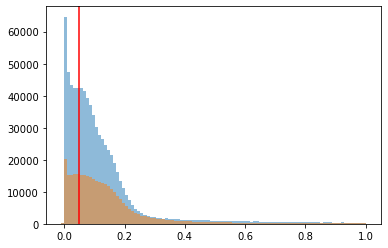

In [51]:
plt.hist(abs(testing["N708_gaapOptimalFluxErr"]/testing["N708_gaapOptimalFlux"]), range=(-.01,1), bins=100, alpha=0.5)
plt.hist(abs(testing["N540_gaapOptimalFluxErr"]/testing["N540_gaapOptimalFlux"]), range=(-.01,1), bins=100, alpha=0.5)
plt.axvline(0.05, c = "red")
plt.show()

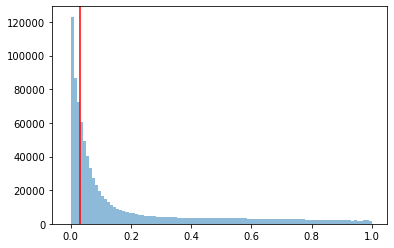

In [50]:
# plt.hist(abs(testing["g_gaapOptimalFluxErr"]/testing["g_gaapOptimalFlux"]), range=(-.01,1), bins=100, alpha=0.5)
# plt.hist(abs(testing["r_gaapOptimalFluxErr"]/testing["r_gaapOptimalFlux"]), range=(-.01,1), bins=100, alpha=0.5)
plt.hist(abs(testing["i_gaapOptimalFluxErr"]/testing["i_gaapOptimalFlux"]), range=(-.01,1), bins=100, alpha=0.5)
# plt.hist(abs(testing["z_gaapOptimalFluxErr"]/testing["z_gaapOptimalFlux"]), range=(-.01,1), bins=100, alpha=0.5)
# plt.hist(abs(testing["y_gaapOptimalFluxErr"]/testing["y_gaapOptimalFlux"]), range=(-.01,1), bins=100, alpha=0.5)
plt.axvline(0.03, c = "red")
plt.show()

In [35]:
testing

objectId,coord_ra,coord_dec,ebv,tract,patch,N708_gaap1p0Flux,N708_gaap1p0FluxErr,N708_blendedness,N708_gaapOptimalFlux,N708_gaapOptimalFluxErr,N708_cModelFlux,N708_cModelFluxErr,N708_cModelFlux_inner,N708_cModel_flag,N540_gaap1p0Flux,N540_gaap1p0FluxErr,N540_blendedness,N540_gaapOptimalFlux,N540_gaapOptimalFluxErr,N540_cModelFlux,N540_cModelFluxErr,N540_cModelFlux_inner,N540_cModel_flag,g_gaap1p0Flux,g_gaap1p0FluxErr,g_blendedness,g_gaapOptimalFlux,g_gaapOptimalFluxErr,g_cModelFlux,g_cModelFluxErr,g_cModelFlux_inner,g_cModel_flag,r_gaap1p0Flux,r_gaap1p0FluxErr,r_blendedness,r_gaapOptimalFlux,r_gaapOptimalFluxErr,r_cModelFlux,r_cModelFluxErr,r_cModelFlux_inner,r_cModel_flag,i_gaap1p0Flux,i_gaap1p0FluxErr,i_blendedness,i_gaapOptimalFlux,i_gaapOptimalFluxErr,i_cModelFlux,i_cModelFluxErr,i_cModelFlux_inner,i_cModel_flag,z_gaap1p0Flux,z_gaap1p0FluxErr,z_blendedness,z_gaapOptimalFlux,z_gaapOptimalFluxErr,z_cModelFlux,z_cModelFluxErr,z_cModelFlux_inner,z_cModel_flag,y_gaap1p0Flux,y_gaap1p0FluxErr,y_blendedness,y_gaapOptimalFlux,y_gaapOptimalFluxErr,y_cModelFlux,y_cModelFluxErr,y_cModelFlux_inner,y_cModel_flag
int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool
3495800463490547713,151.08443813783396,1.3916901105641533,0.028918761759996414,9813,0,787.457411837102,54.21291847483977,0.0,654.2860564074824,42.360085615824616,--,--,--,True,350.31696443575976,40.46617727339147,0.0,234.377709688426,36.916336880640095,--,--,--,True,192.1221787998984,21.481531981205563,--,133.87544695462293,16.4642300037556,--,--,--,True,358.153730831161,27.19342053459803,--,300.09548157652625,21.1906478572206,--,--,--,True,712.4440773458288,34.962278114739256,--,607.1004597461446,24.663834621178303,--,--,--,True,1378.7354315153875,71.98212458445566,--,1166.9001286081277,52.12857447007485,--,--,--,True,2055.6481649135176,162.37591100923186,--,1814.7320841164774,118.66527810483073,--,--,--,True
3495800463490547714,151.0828515903241,1.3918306275775547,0.02884758450090885,9813,0,716.1052899610945,48.774149830085506,0.0,701.1777269134869,48.01314287907943,--,--,--,True,521.4422825417713,42.45638164102585,0.0,511.4946947027081,41.671978111473955,--,--,--,True,347.90010210195334,22.435020085304682,--,340.6902989239862,21.787751558136765,--,--,--,True,483.7366148370689,27.513818126197396,--,476.4023038862146,26.737053913715727,--,--,--,True,584.8731769964203,34.445228700858166,--,571.8319605763784,33.316002706326245,--,--,--,True,623.6833914575301,70.23436595787122,--,609.4660939169071,68.0206904223931,--,--,--,True,455.83519453990647,164.5314602863044,--,439.4578744466615,159.42406617434972,--,--,--,True
3495800463490547715,151.07309839368517,1.391694103342743,0.028401503339409828,9813,0,339.9563713252834,49.66987480697498,0.0,--,--,--,--,--,True,110.14084927608978,40.4643026643365,--,--,--,--,--,--,True,69.94452555301129,22.163149885135102,--,--,--,--,--,--,True,161.8661693111592,27.42095605662642,--,--,--,--,--,--,True,150.1608979845246,37.068273923466634,--,116.7202498247451,25.97882978132064,--,--,--,True,180.88924936884519,76.01279870619025,--,111.81723469344574,56.36284001096072,--,--,--,True,157.83572149330226,181.4318532221554,--,4.591966204718548,132.06644094492273,--,--,--,True
3495800463490547716,151.07057844173025,1.391694983229763,0.028284458443522453,9813,0,116.53456105452251,49.68016124182469,0.0,--,--,--,--,--,True,80.17394897228091,39.99809024422825,--,--,--,--,--,--,True,-13.303814704643507,22.08620283097036,--,--,--,--,--,--,True,10.890363530613353,27.623652003199997,--,--,--,--,--,--